In [2]:
import yfinance
import talib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = yfinance.download('NSE','2016-1-1','2020-3-4')
rsi = talib.RSI(data["Close"])

[*********************100%***********************]  1 of 1 completed


In [4]:
rsi

Date
2015-12-31          NaN
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
2016-01-07          NaN
                ...    
2020-02-26    40.137274
2020-02-27    40.137274
2020-02-28    30.994009
2020-03-02    30.994009
2020-03-03    43.445212
Length: 1045, dtype: float64

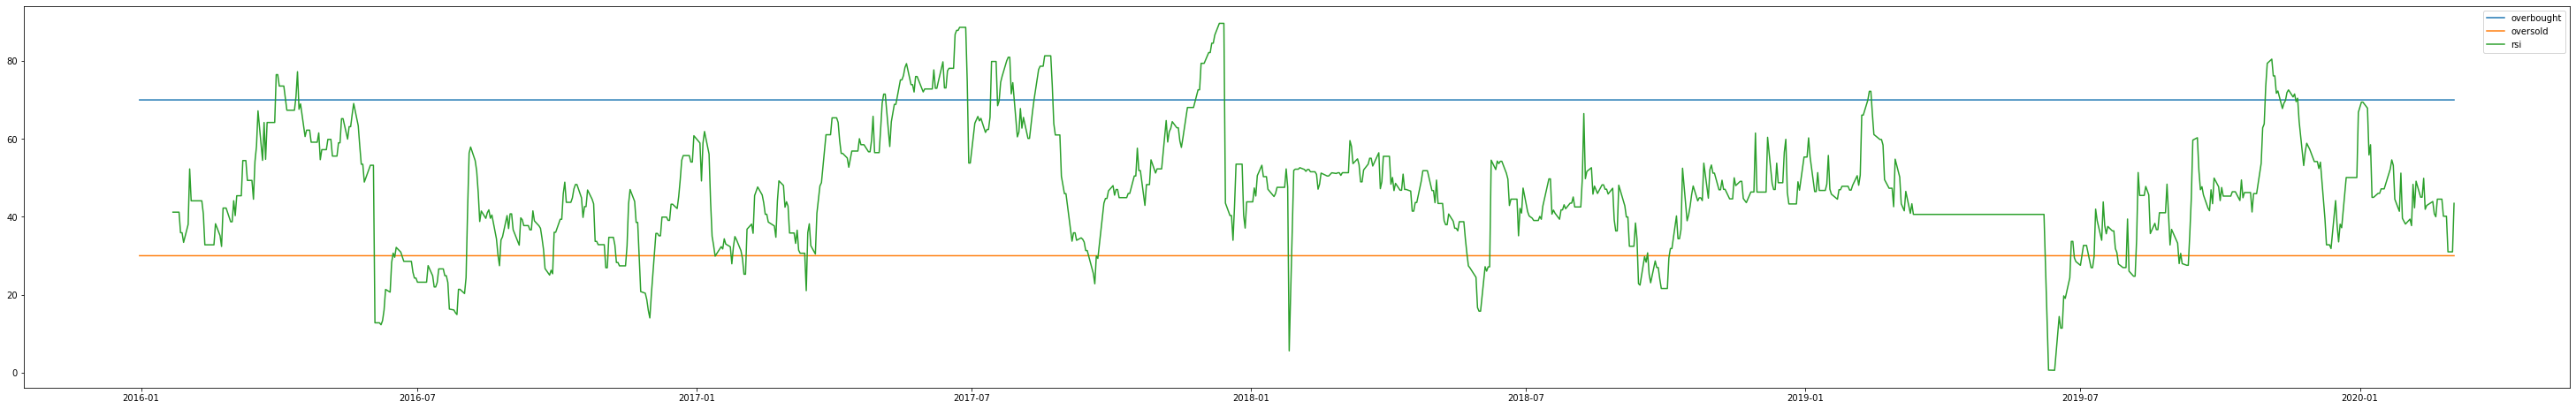

In [5]:
fig = plt.figure()
fig.set_size_inches((40, 30))
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
ax_rsi.plot(data.index, rsi, label="rsi")
# ax_rsi.plot(data["Close"])
ax_rsi.legend()

In [6]:
section = None
sections = []
for i in range(len(rsi)): 
    if rsi[i] < 30:
        section = 'oversold'
    elif rsi[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)

In [7]:
len(sections)

1045

In [8]:
testData=data.copy()
testData["RSI"]=rsi

In [9]:
testData=testData[14:]

In [10]:
# create 20 days simple moving average column
testData['21_SMA'] = testData["RSI"].rolling(window = 21, min_periods = 1).mean()
# create 50 days simple moving average column
testData['3_EMA'] = testData['RSI'].ewm(span = 3, adjust = False).mean()
# display first few rows
testData.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,21_SMA,3_EMA
Date,,,,,,,,,
2016-01-22,23.75,24.50,23.75,23.75,23.75,23900,41.176471,41.176471,41.176471
2016-01-25,23.75,24.50,23.75,23.75,23.75,41500,41.176471,41.176471,41.176471
2016-01-26,23.75,24.00,23.75,23.75,23.75,10300,41.176471,41.176471,41.176471
2016-01-27,23.25,23.75,23.00,23.25,23.25,5600,35.901207,39.857655,38.538839
2016-01-28,23.25,23.25,23.25,23.25,23.25,0,35.901207,39.066365,37.220023


In [11]:
testData['Trade'] =0.0
testData['Trade'] = np.where(testData['21_SMA'] > testData['3_EMA'], 1.0, 0.0)
testData["Position"] = testData["Trade"].diff()


# When ‘Position’ = 1, it implies that the Signal has changed from 0 to 1 meaning a short-term(faster)
# moving average has crossed above the long-term(slower) moving average, thereby triggering a buy call.
# When ‘Position’ = -1, it implies that the Signal has changed from 1 to 0 meaning a short-term(faster) 
# moving average has crossed below the long-term(slower) moving average, thereby triggering a sell call.
# display first few rows
testData.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,21_SMA,3_EMA,Trade,Position
Date,,,,,,,,,,,
2016-01-22,23.75,24.50,23.75,23.75,23.75,23900,41.176471,41.176471,41.176471,0.0,NaN
2016-01-25,23.75,24.50,23.75,23.75,23.75,41500,41.176471,41.176471,41.176471,0.0,0.0
2016-01-26,23.75,24.00,23.75,23.75,23.75,10300,41.176471,41.176471,41.176471,0.0,0.0
2016-01-27,23.25,23.75,23.00,23.25,23.25,5600,35.901207,39.857655,38.538839,1.0,1.0
2016-01-28,23.25,23.25,23.25,23.25,23.25,0,35.901207,39.066365,37.220023,1.0,0.0


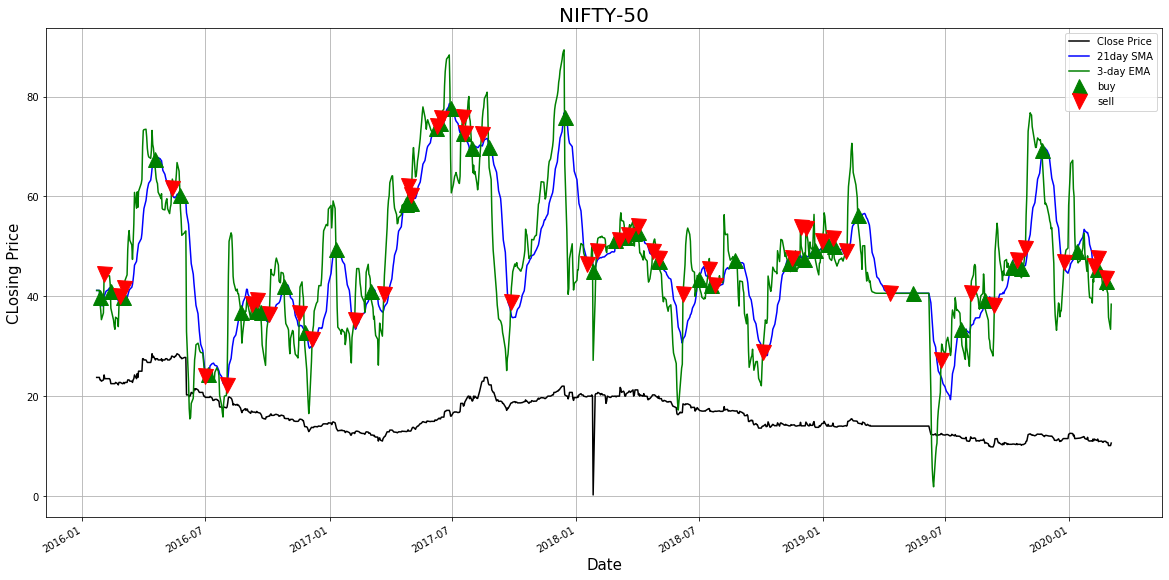

In [12]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
testData["Close"].plot(color = 'k', label= 'Close Price') 
testData["21_SMA"].plot(color ='b', label = '21day SMA') 
testData["3_EMA"].plot(color = 'g', label = '3-day EMA')
# plot ‘buy’ signals
plt.plot(testData[testData["Position"] == 1].index, 
         testData["21_SMA"][testData["Position"] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(testData[testData["Position"] == -1].index, 
         testData["3_EMA"][testData["Position"] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('CLosing Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('NIFTY-50', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [13]:
testData.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,21_SMA,3_EMA,Trade,Position
Date,,,,,,,,,,,
2020-02-26,10.7,10.70,10.7,10.7,10.7,9900,40.137274,43.018920,41.022667,1.0,0.0
2020-02-27,10.7,10.80,10.7,10.7,10.7,28100,40.137274,42.491767,40.579970,1.0,0.0
2020-02-28,10.1,10.65,9.9,10.1,10.1,20700,30.994009,42.081689,35.786990,1.0,0.0
2020-03-02,10.1,10.65,9.9,10.1,10.1,20700,30.994009,41.706357,33.390499,1.0,0.0
2020-03-03,10.6,11.00,10.1,10.6,10.6,11100,43.445212,41.959954,38.417856,1.0,0.0
